In [1]:
%matplotlib inline


# Test with permutations the significance of a classification score


In order to test if a classification score is significative a technique
in repeating the classification procedure after randomizing, permuting,
the labels. The p-value is then given by the percentage of runs for
which the score obtained is greater than the classification score
obtained in the first place.




In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn import datasets


# #############################################################################
# Loading dataset
X = pickle.load(open('X.pickle', 'rb'), encoding='latin1')
y = pickle.load(open('Y.pickle', 'rb'), encoding='latin1')
n_classes = np.unique(y).size

In [10]:
svm = SVC(kernel='linear')
cv = StratifiedKFold(2)

score, permutation_scores, pvalue = permutation_test_score(
    svm, X, y, scoring="accuracy", cv=cv, n_permutations=50, n_jobs=1)

print("Classification score %s (pvalue : %s)" % (score, pvalue))

Classification score 0.5296540185277233 (pvalue : 0.0196078431372549)


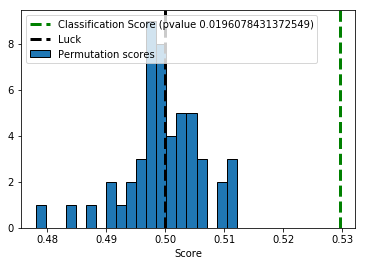

In [11]:
# #############################################################################
# View histogram of permutation scores
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()

plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Luck')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()